Python实现KNN

距离计算
- p=1：曼哈度距离
- p=2：欧式距离 常用

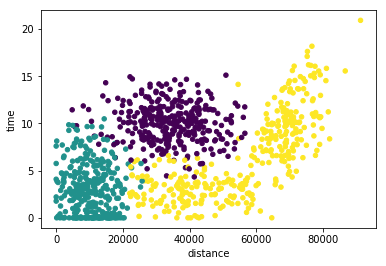

The total error rate is:0.290000


In [56]:
'''
约会数据
    数据包含三个特征：
        1.每年获取的飞行常客里程数
        2.玩视频游戏所耗时间百分比
        3.每周消耗冰淇淋的公升数
    人物分为三类：
        1.不喜欢的人   didntLike
        2.魅力一般的人 smallDoses
        3.极具魅力的人 largeDoses
'''
import operator
import numpy as np
import matplotlib.pyplot as plt

def KNN():
    #读取文本中的数据，将数据转化成分类器需要的格式,将标记由字符型转化为数值型
    filename = "E:\courseware\machine leaning\code\MLiA_SourceCode\machinelearninginaction\Ch02\datingTestSet.txt"
    data, labels = load_data(filename)
    #绘制数据的散点图，可视化数据，分析数据
    plt.figure()
    plt.scatter(data[:,0],data[:,1],c = labels, s = 20)
    plt.xlabel("distance")
    plt.ylabel("time")
    plt.show()
    #数据归一化处理
    data = normalization(data)
    #划分测试集和训练集，测试集占样本集的0.1
    m = data.shape[0]
    ratio = 0.10
    numTest = int(m*ratio)
    errorCount = 0.0
    for i in range(numTest):
        result = predict(data[i,:],data[numTest:m,:],labels[numTest:m],5)
        if(result == labels[i]):
            errorCount += 1.0
    print("The total error rate is:%f" % (errorCount/float(numTest)))

def predict(X_test, X_train, y_train, k):
    size = X_train.shape[0]
    difference = np.tile(X_test, (size, 1)) - X_train
    sqDifference = difference**2
    sumDifference = sqDifference.sum(axis=1)
    distances = sumDifference**0.5
    #argsort的作用是将数组中的元素从小到大排序，返回的数据是元素在原数组的索引
    sortDistIndex = distances.argsort()
    countlabel = {}
    for i in range(k):
        label = y_train[sortDistIndex[i]]
        if label in countlabel:
            countlabel[label] += 1
        else:
            countlabel[label] = 1
    sortlabel = sorted(countlabel.items(), key=operator.itemgetter(1), reverse=True)
    return sortlabel[0][0]

#数据归一化函数
def normalization(data):
     minVals = data.min(0)
     maxVals = data.max(0)
     ranges = maxVals  - minVals
     normData = np.zeros(np.shape(data))
     m = data.shape[0]
     normData = normData - np.tile(minVals, (m,1))
     normData = normData / np.tile(ranges, (m,1))
     return normData

#定义load_data函数来读取文本中的数据，并进行形式转化
def load_data(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()  #按行读取文本中的数据，返回的是list形式
        length = len(lines)    #数据的个数
        data = np.zeros((length,3))
        labels = []
        dict = {}
        index = 0
        labelindex = 0
        for line in lines:
            line = line.strip()  #strip()移除字符串头和尾的字符，默认空格和换行
            atrlist = line.split('\t') #根据空格分割字符，得到三个特征列表
            data[index,:] = atrlist[0:3]
            key = atrlist[-1]
            if key in dict:
                labels.append(dict.get(key))
            else:
                dict[key] = labelindex
                labelindex += 1
                labels.append(dict.get(key))
            index += 1
        return data, labels

if __name__ == '__main__':
    KNN()


# KNN在scikit-learn中的实现  

在scikit-learn中 实现了 k-近邻算法：```KNeighborsClassifier```  

```sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, metric=’minkowski’, metric_params=None, n_jobs=None, **kwargs)```  


In [1]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [2]:
def load_data(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()  #按行读取文本中的数据，返回的是list形式
        length = len(lines)    #数据的个数
        data = np.zeros((length,3))
        labels = []
        dict = {}
        index = 0
        labelindex = 0
        for line in lines:
            line = line.strip()  #strip()移除字符串头和尾的字符，默认空格和换行
            atrlist = line.split('\t') #根据空格分割字符，得到三个特征列表
            data[index,:] = atrlist[0:3]
            key = atrlist[-1]
            if key in dict:
                labels.append(dict.get(key))
            else:
                dict[key] = labelindex
                labelindex += 1
                labels.append(dict.get(key))
            index += 1
        return data, labels

In [3]:
#导入数据
filename = "E:\courseware\machine leaning\code\MLiA_SourceCode\machinelearninginaction\Ch02\datingTestSet.txt"
data, labels = load_data(filename)

In [4]:
#划分训练集和测试集
x_train,x_test, y_train, y_test = train_test_split(data, labels,test_size=0.1) 

In [5]:
#数据归一化
scalar = MinMaxScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.fit_transform(x_test)

In [7]:
#构建模型
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [8]:
predict = model.predict(x_test)
right = sum(predict == y_test)
predict = np.hstack((np.reshape(predict,(-1,1)), np.reshape(y_test,(-1,1))))
print(predict)
print("测试集的精确度是：%f%%" % (right*100.0/predict.shape[0]))

[[1 1]
 [2 2]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [0 0]
 [0 2]
 [2 2]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [2 2]
 [0 0]
 [2 2]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [2 2]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [2 2]
 [0 0]
 [0 0]
 [0 0]
 [2 2]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [2 2]
 [0 2]
 [0 0]
 [2 2]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [2 2]
 [0 2]
 [0 0]
 [0 0]
 [1 1]
 [2 2]
 [2 2]
 [0 0]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [2 2]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [2 2]
 [2 2]
 [0 0]
 [0 1]
 [0 0]
 [2 2]
 [0 2]
 [2 2]
 [0 1]
 [2 2]
 [0 0]
 [2 2]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [2 2]
 [2 0]
 [0 0]
 [2 1]
 [1 1]
 [1 1]
 [0 0]]
测试集的精确度是：92.000000%


In [9]:
accuracy = model.score(x_test,y_test)
print(accuracy)

0.92


In [54]:
#导入数据
filename = "E:\courseware\machine leaning\code\MLiA_SourceCode\machinelearninginaction\Ch02\datingTestSet.txt"
data, labels = load_data(filename)
#数据归一化
scalar = MinMaxScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.fit_transform(x_test)
x_train,x_test, y_train, y_test = train_test_split(data, labels,test_size=0.1) 
#构建模型
list =[]
for i in range(1,20):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train, y_train)
    predict = model.predict(x_test)
    right = sum(predict == y_test)
    accuracy = right*1.0/predict.shape[0]
    list.append(accuracy)
min_accuracy = np.mean(list)
print("平均精确度为: %f" % min_accuracy)

平均精确度为: 0.812632


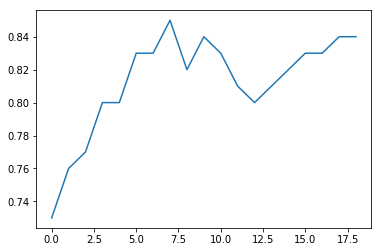

In [55]:
plt.figure()
plt.plot(list)
plt.show()